<a href="https://colab.research.google.com/github/April-LY/Embedding-experiment-in-BioNLP-course/blob/main/hierarchyCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['1', '2', '3', '4', '5', '6', '7', '8', '9']
                               0         1     ...      1022      1023
carbon sensitivity         0.027250 -0.221608  ...  0.231350  0.200565
epigenetic trait           0.146124  0.317986  ... -0.015389  0.266088
alkali soil sensitivity    0.074210 -0.286252  ...  0.110276  0.264293
reversible male sterility  0.403265  0.106409  ... -0.004952  0.624981
calcium sensitivity        0.129410 -0.184662  ...  0.155666  0.286032
...                             ...       ...  ...       ...       ...
greenbug                   0.077024  0.034595  ...  0.029036  0.065175
greenbug resistance        0.178698 -0.030197  ...  0.056009  0.182222
heat resistance           -0.375946  0.357371  ... -0.089984  0.171404
leafhopper                 1.201137  1.846696  ... -0.105651  0.192109
leafhopper resistance      0.738955  1.819143  ... -0.113895  0.612028

[1800 rows x 1024 columns]
                           carbon sensitivity  ...  leafhopper resistance


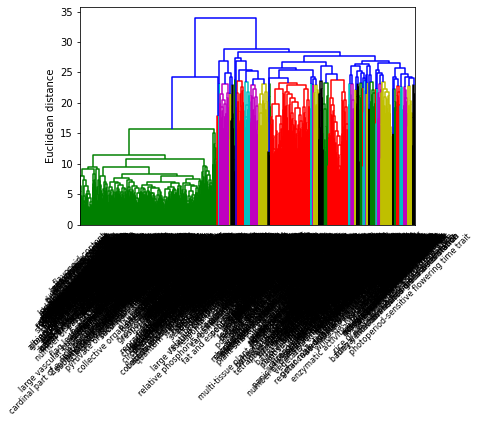

<Figure size 18432x36864 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


embeddingFile = '/content/rtoPhrases.bio-bert.embedding.txt'
trait = []
coreEmbedding = []
catagories = '1 2 3 4 5 6 7 8 9'
cluster = catagories.split(" ")
print(cluster)
with open(embeddingFile) as f:
  for lines in f:
    line = lines.split("\t")
    trait.append(line[0])
    tempStrList = np.array(line[1].split(" "))
    str2num = tempStrList.astype(np.float64)
    #str2num = [float(x) for x in tempStrList]
    #str2num = np.array(line[1])
    #print(str2num)
    coreEmbedding.append(str2num)

df = pd.DataFrame(coreEmbedding,index=trait)
print(df)
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=trait,index=trait)
row_dist.dropna(axis=0,how='any')  
print(row_dist)
row_clusters = linkage(pdist(df,metric="euclidean"),method='complete')
print(pd.DataFrame(row_clusters,columns=['row label1','row label2','distance','no. of items in clust.'],index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])]))






In [ ]:
llabel = cluster.cut_tree(row_dendr,)

{'icoord': [[25.0, 25.0, 35.0, 35.0], [55.0, 55.0, 65.0, 65.0], [75.0, 75.0, 85.0, 85.0], [60.0, 60.0, 80.0, 80.0], [95.0, 95.0, 105.0, 105.0], [115.0, 115.0, 125.0, 125.0], [100.0, 100.0, 120.0, 120.0], [70.0, 70.0, 110.0, 110.0], [45.0, 45.0, 90.0, 90.0], [30.0, 30.0, 67.5, 67.5], [15.0, 15.0, 48.75, 48.75], [5.0, 5.0, 31.875, 31.875], [135.0, 135.0, 145.0, 145.0], [165.0, 165.0, 175.0, 175.0], [185.0, 185.0, 195.0, 195.0], [170.0, 170.0, 190.0, 190.0], [155.0, 155.0, 180.0, 180.0], [205.0, 205.0, 215.0, 215.0], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [225.0, 225.0, 242.5, 242.5], [210.0, 210.0, 233.75, 233.75], [265.0, 265.0, 275.0, 275.0], [305.0, 305.0, 315.0, 315.0], [295.0, 295.0, 310.0, 310.0], [285.0, 285.0, 302.5, 302.5], [270.0, 270.0, 293.75, 293.75], [221.875, 221.875, 281.875, 281.875], [167.5, 167.5, 251.875, 251.875], [345.0, 345.0, 355.0, 355.0], [335.0, 335.0, 350.0, 350.0], [325.0, 325.0, 342.5, 342.5], [375.0, 375.0, 385.0, 385.0], [365.0, 365.0,

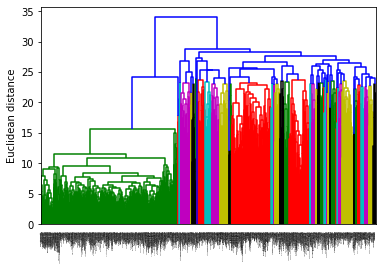

<Figure size 36864x18432 with 0 Axes>

In [9]:
#层次聚类树
row_dendr = dendrogram(row_clusters,labels=trait,leaf_font_size=0.5)
print(row_dendr)
plt.ylabel('Euclidean distance')
plt.savefig("tryfont05.pdf")
plt.figure(figsize=(512,256))
plt.tight_layout()

#plt.show()


In [ ]:
rtoFile = '/content/rto.obo'
tokenf = '/content/tokenRTO.txt'
traitList = []
wf = open(tokenf, 'w', encoding='utf-8')
with open(rtoFile) as rtof:
  for line in rtof:
    line = line.split(":")
    if line[0] == "name":
      #去除换行符
      deleHspace = line[1].lstrip(" ")
      print(deleHspace)
      wf.write(deleHspace)
wf.close()

In [ ]:
with open(tokenf) as tf:
  tokenList = []
  for line in tf:
    phrases = line.strip()
    tokenList.append(phrases)

print(tokenList)



['carbon sensitivity', 'epigenetic trait', 'alkali soil sensitivity', 'reversible male sterility', 'calcium sensitivity', 'sulfur sensitivity', 'potassium sensitivity', 'genic male sterility-photoperiod sensitive', 'magnesium sensitivity', 'nitrogen sensitivity', 'hydrogen sensitivity', 'resistance to disease by mycoplasma-like organism', 'panicle weight', 'oxygen sensitivity', 'cobalt sensitivity', 'plant morphology trait', 'boron sensitivity', 'seedling height', 'black streak dwarf virus resistance', 'copper sensitivity', 'stink bug resistance', 'fungal infection related grain discoloration', 'ligule length', 'molybdenum sensitivity', 'aborted tri-nucleate stage', 'culm number', 'unfilled grain number', 'chlorine sensitivity', 'sedge weed', 'silicon sensitivity', 'selenium sensitivity', 'iodine sensitivity', 'chromium sensitivity', 'incompatibility trait', 'hybrid incompatibility', 'male sterility extent', 'fluorine sensitivity', 'yield component', 'panicle length', 'brown rice lengt